문제정의: 환자 정보를 사용하여 심장 질환 유무(정상 :0, 심장 질환 진단: 1)를 분류하는 이중 분류 문제로 정의

데이터 다운로드 : https://archive.ics.uci.edu/ml/datasets/heart+disease

라이브러리 임포트

In [1]:
# Lubraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

데이터 준비하기

In [92]:
df = pd.read_csv('/content/drive/MyDrive/data_analysis_references/csv_files_collection/disease_files/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


데이터 살펴보기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# null 값 확인
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

데이터 전처리

In [5]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var=['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var] = df[categorical_var].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



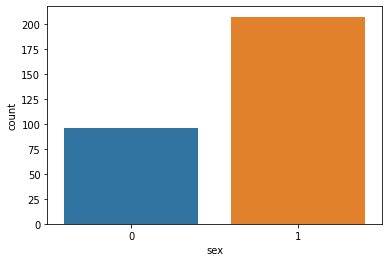

In [8]:
# 성별에 따른 환자의 수 ( 0: 여성, 1: 남성)
sns.countplot(df.sex)

In [9]:
df.groupby('cp').sum().reset_index()[['cp','output']]

,cp,output
0,0,39
1,1,41
2,2,69
3,3,16


In [10]:
# 화자의 가슴 통증 타입 별 심장 질환 환자 수 (cp: chest pain type)
px.bar(df.groupby('cp').sum().reset_index()[['cp','output']],
       x='cp', y='output', color='cp',
       title='Count plot of Heart Disease with Respect to Chest Pain')

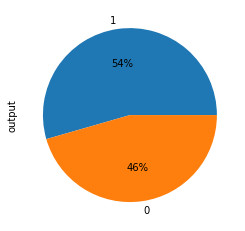

In [11]:
# 정상 - 심장병 환자 비율 (0: 정상, 1: 심장병)
df.output.value_counts().plot.pie(autopct = '%1.f%%')

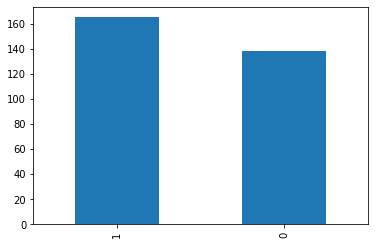

In [12]:
df.output.value_counts().plot.bar()

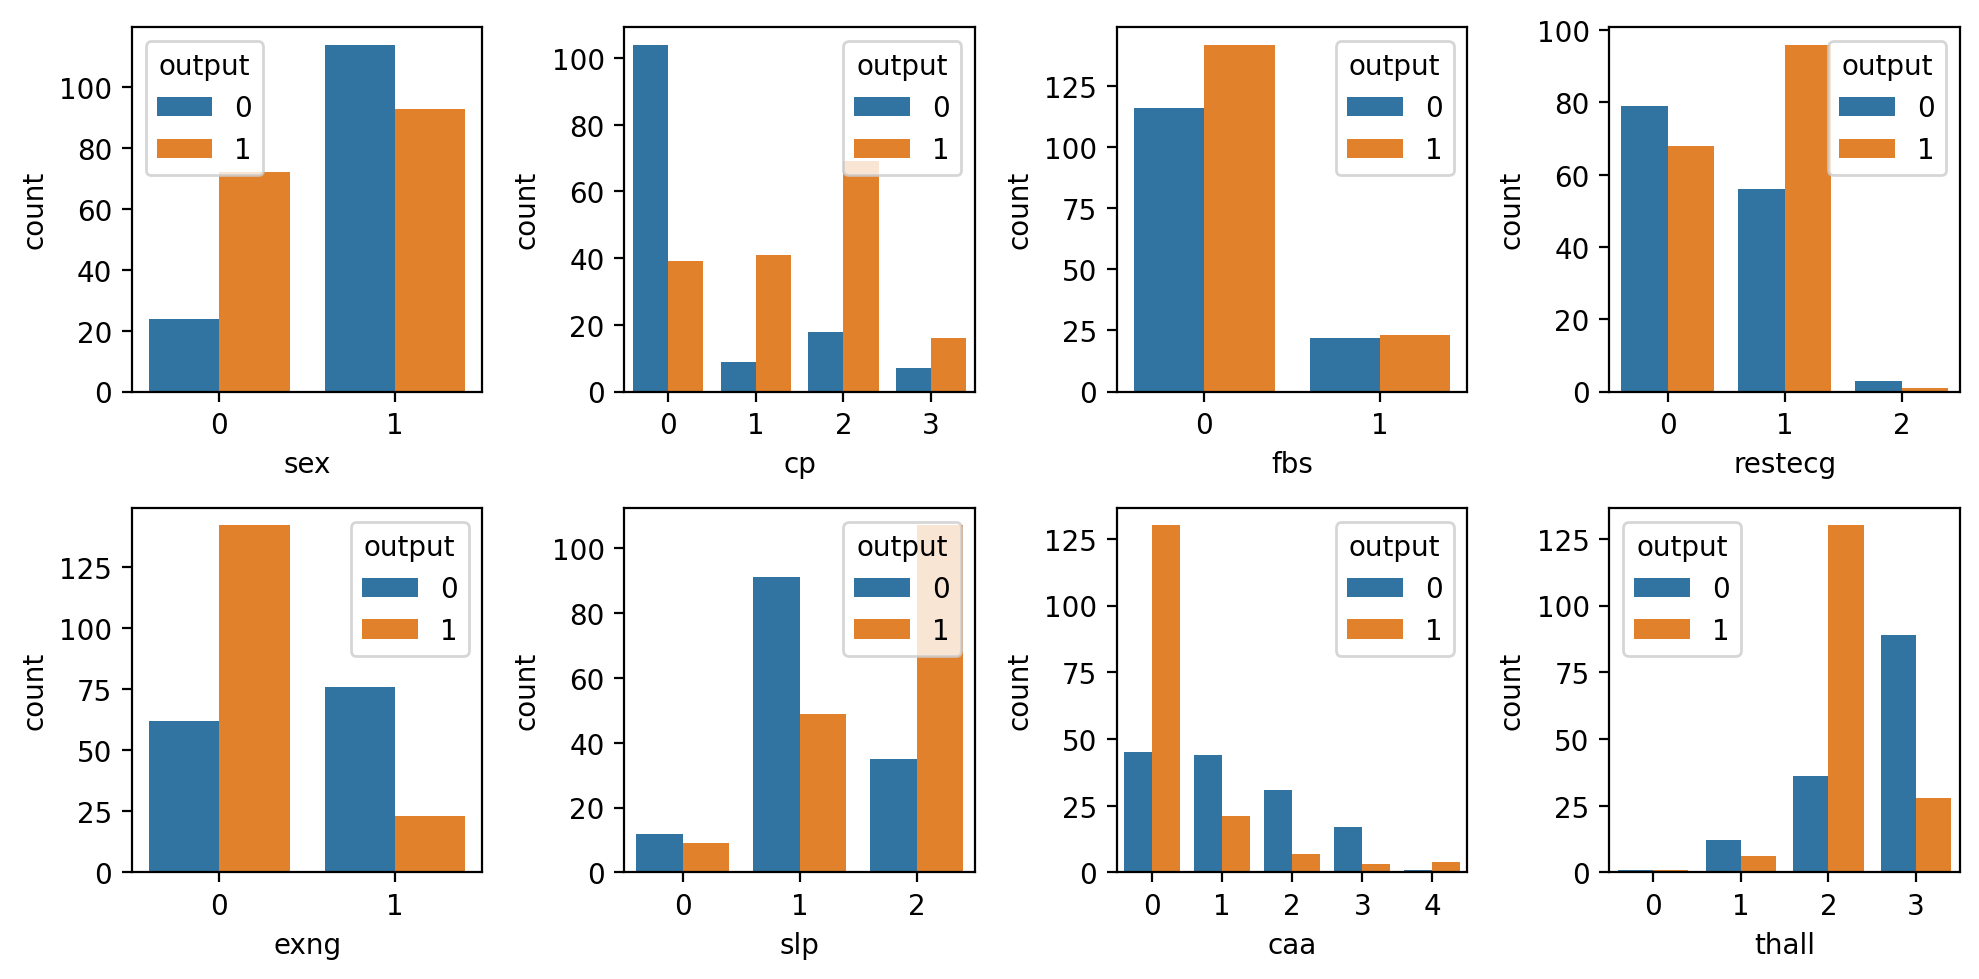

In [13]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
fig, ax = plt.subplots(2,4, figsize=(10,5), dpi=200)

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  sns.countplot(x=cat_var, data=df, hue='output', ax= axis)

plt.tight_layout()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [15]:
# 수히형으로 되어 있는 컬럼 -> 이상치
numeric_var = [i for i in df.columns if i not in categorical_var ][:-1]

In [16]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

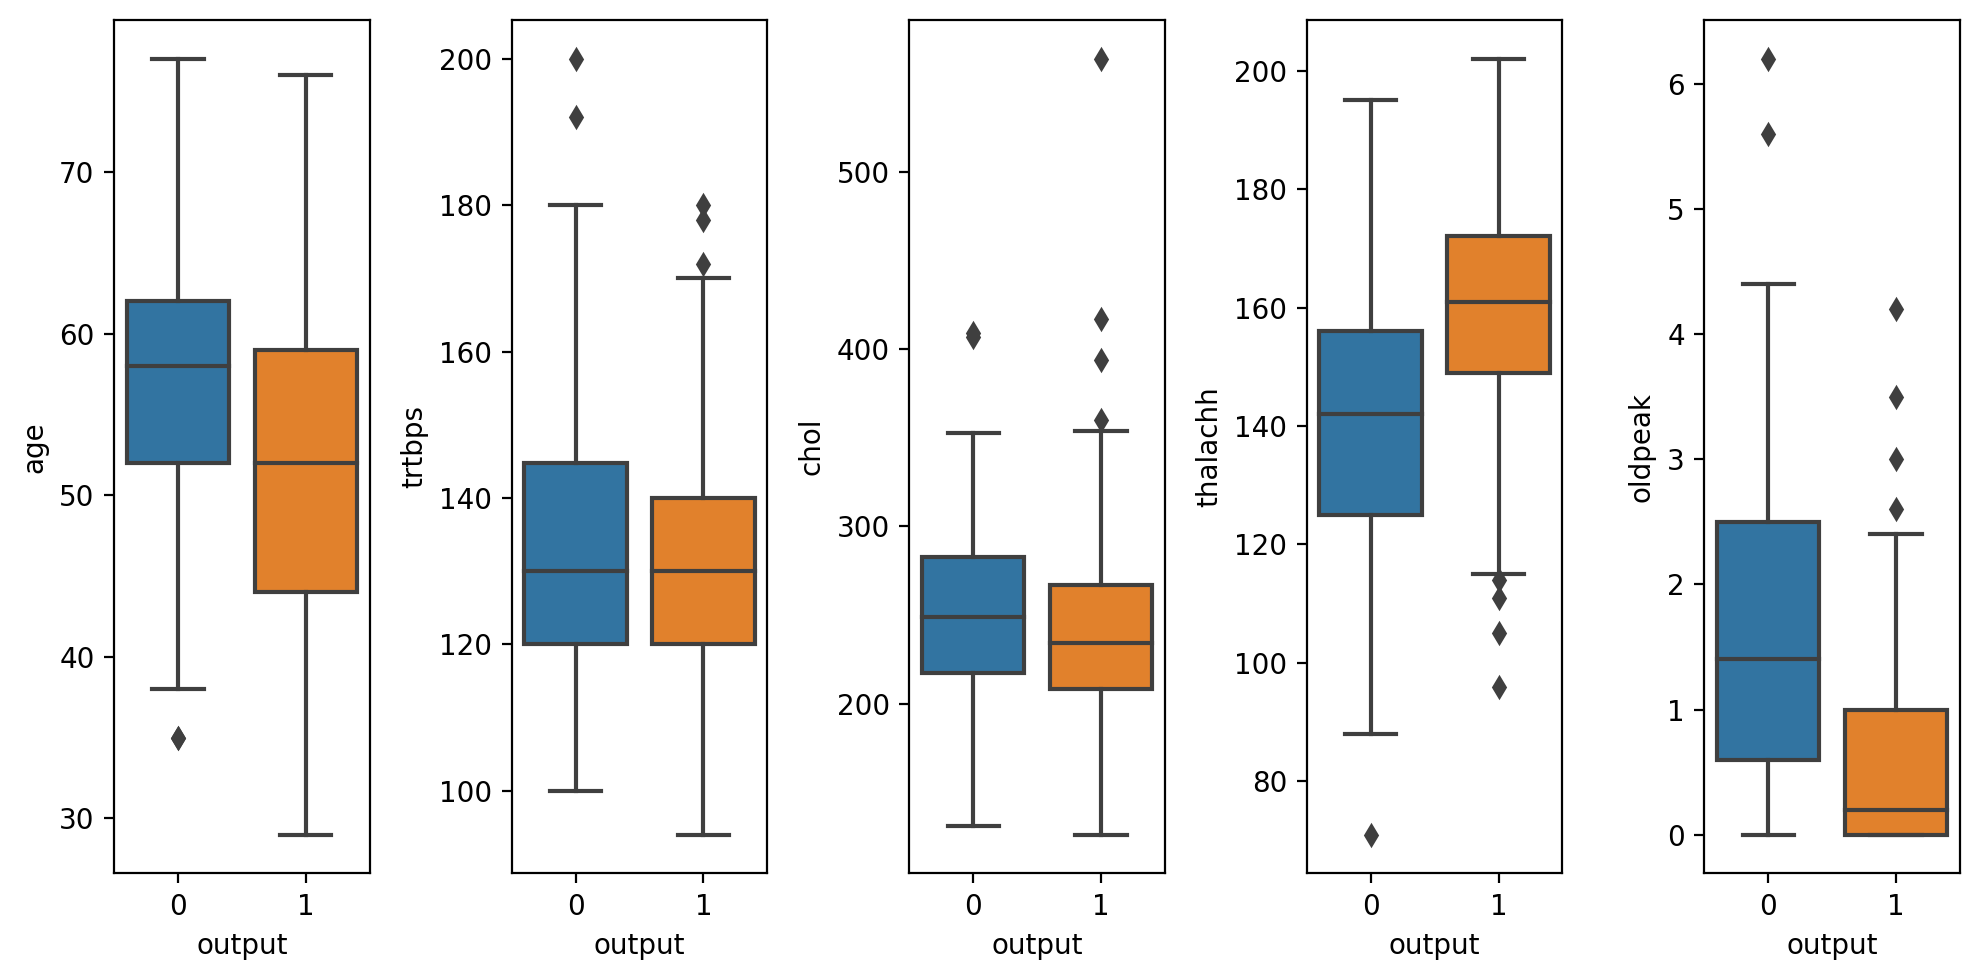

In [17]:
fig, ax = plt.subplots(1,5, figsize=(10,5), dpi=200)

for axis, num_var in zip(ax, numeric_var):
  sns.boxplot(y=num_var, data=df, x='output', ax= axis)

plt.tight_layout()

In [18]:
# 이상치 삭제 trtbps, chol, thalachh, oldpeak
# 상위 95%에 위치 하고 있는 데이터 셋만 삭제
df = df[df['trtbps'] < df['trtbps'].quantile(0.95)]
df = df[df['chol'] < df['chol'].quantile(0.95)]
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]
df = df[df['oldpeak'] < df['oldpeak'].quantile(0.95)]

In [19]:
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]

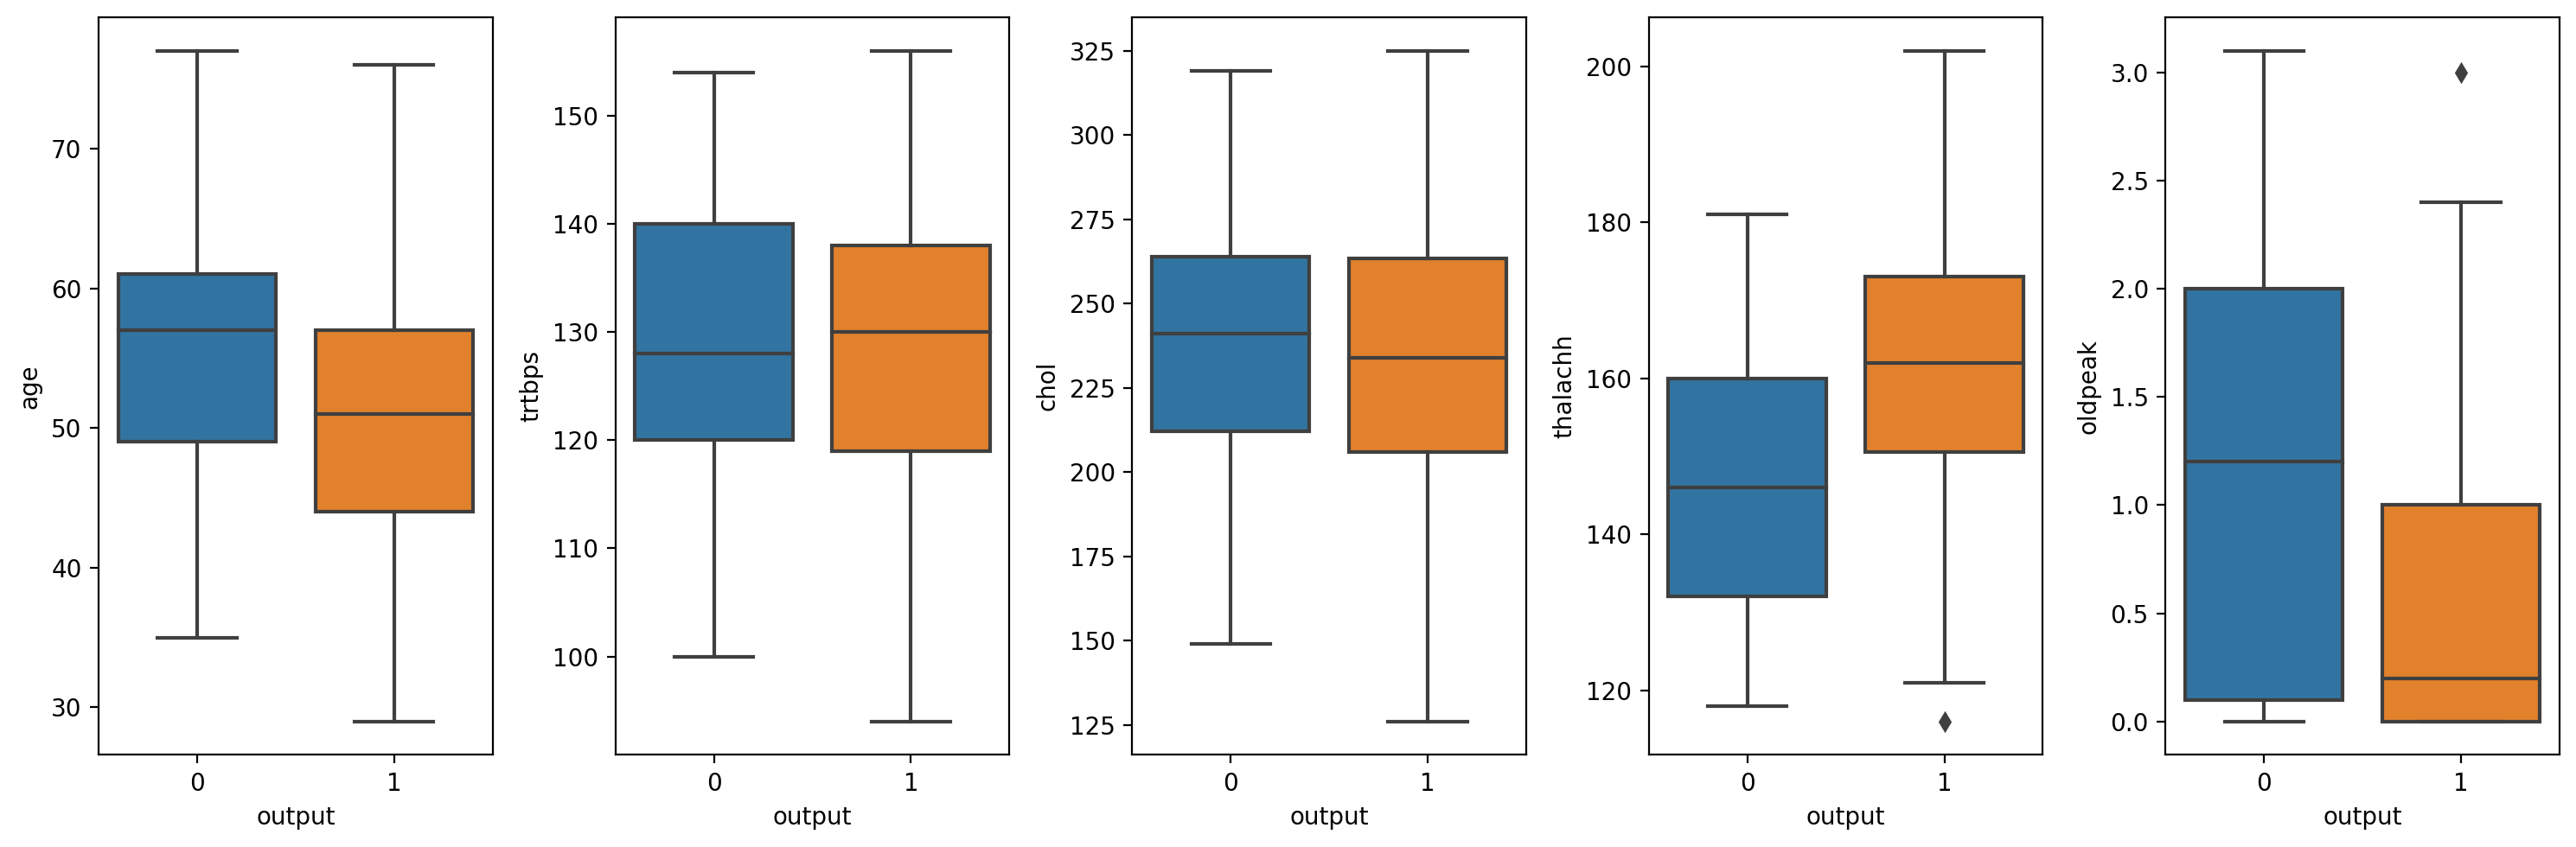

In [20]:
fig, ax = plt.subplots(1,5, figsize=(15,5), dpi=200)

for axis, num_var in zip(ax, numeric_var):
  sns.boxplot(y=num_var, data=df, x='output', ax= axis)

plt.tight_layout()

데이터 분리하기

In [21]:
# X (시험지), y(정답) 분리하기
X = df.iloc[:, :-1]
y = df['output']

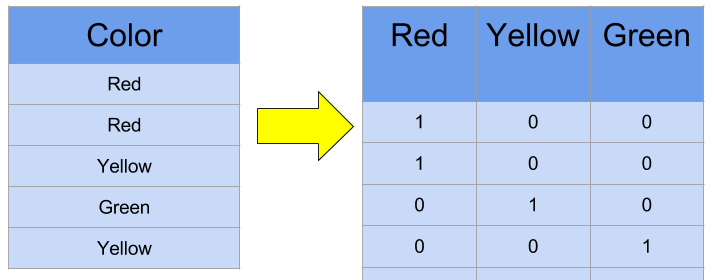

In [22]:
# 원-핫 인코딩 처리
# 컬럼 > 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first=True)

In [23]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X,temp],axis=1)

In [24]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)

In [25]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


훈련용 테스트 데이터 분리하기

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_modified, 
                                                    y, 
                                                    train_size=0.8, # test_size
                                                    random_state=7)

차원 축소 -> 스케일링

In [71]:
# 수치형 데이터 정규화
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

머신러닝 모델 구축 - 1) LogisticRegression

In [72]:
log_reg = LogisticRegression().fit(X_train,y_train)

In [73]:
# 정확도 확인
print('Train data Score:', log_reg.score(X_train,y_train))
print('Test data Score:', log_reg.score(X_test,y_test))

Train data Score: 0.8659217877094972
Test data Score: 0.8444444444444444


머신러닝 모델 구축 -2) Decision Tree

In [74]:
tree = DecisionTreeClassifier(max_depth=5, 
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train, y_train)

In [75]:
# 정확도 확인
print('Train data Score:', tree.score(X_train,y_train))
print('Test data Score:', tree.score(X_test,y_test))

Train data Score: 0.7988826815642458
Test data Score: 0.7555555555555555


머신러닝 모델 구축 -2) GradientBoostingClassifier

In [76]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train, y_train)

In [77]:
# 정확도 확인
print('Train data Score:', boost.score(X_train,y_train))
print('Test data Score:', boost.score(X_test,y_test))

Train data Score: 0.9832402234636871
Test data Score: 0.7555555555555555


성능평기 - Roc커브

In [78]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

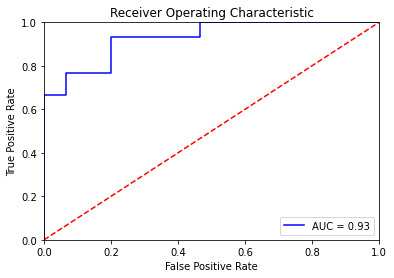

In [79]:
# Logistic Regression ROC
plot_auc_roc(log_reg)

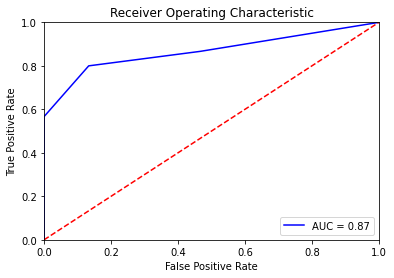

In [80]:
# Decision Tree
plot_auc_roc(tree)

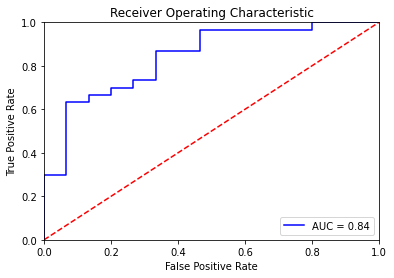

In [81]:
# GradientBoostingClassifie
plot_auc_roc(boost)

모델 성능 평가

In [82]:
# Logistic Regression ROC 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.90      0.87      0.88        30

    accuracy                           0.84        45
   macro avg       0.82      0.83      0.83        45
weighted avg       0.85      0.84      0.85        45



In [83]:
# tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('tree 평가 지표')
print(tree_report)

tree 평가 지표
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.79      0.87      0.83        30

    accuracy                           0.76        45
   macro avg       0.73      0.70      0.71        45
weighted avg       0.75      0.76      0.75        45



In [84]:
# boost 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('boost 평가 지표')
print(boost_report)

boost 평가 지표
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.83      0.80      0.81        30

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.76      0.76      0.76        45



모델 성능 평가

In [85]:
precision_list = []
recall_list = []

In [86]:
# Logistic Regression ROC 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.90      0.87      0.88        30

    accuracy                           0.84        45
   macro avg       0.82      0.83      0.83        45
weighted avg       0.85      0.84      0.85        45

accuracy 0.8444444444444444
precision 0.896551724137931
recall 0.8666666666666667
f1 0.8813559322033899


In [87]:
# tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('tree 평가 지표')
print(tree_report)
print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )

tree 평가 지표
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.79      0.87      0.83        30

    accuracy                           0.76        45
   macro avg       0.73      0.70      0.71        45
weighted avg       0.75      0.76      0.75        45

accuracy 0.7555555555555555
precision 0.7878787878787878
recall 0.8666666666666667
f1 0.8253968253968254


In [88]:
# boost 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('boost 평가 지표')
print(boost_report)

print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
# Precision : 예측한 모델 중 실제 사람이 있는 비율

print('recall', metrics.recall_score(y_test,boost_y_hat) )
# Recall :실제 중 모델이 심장병이라 예측한 사람
# Recall 높을수록 오진단 (심장병인데 아니라는 진단을 낮추려면 Recall이 낮아야한다.)
# Recall을 중점으로 봐야함
# Recall이 제일 높은 모델을 선택해야 한다.

print('f1', metrics.f1_score(y_test,boost_y_hat) )
# 둘 다 중요하다면 f1 score를 확인한다.

boost 평가 지표
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.83      0.80      0.81        30

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.76      0.76      0.76        45

accuracy 0.7555555555555555
precision 0.8275862068965517
recall 0.8
f1 0.8135593220338982


In [89]:
precision_list = []
recall_list = []



precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

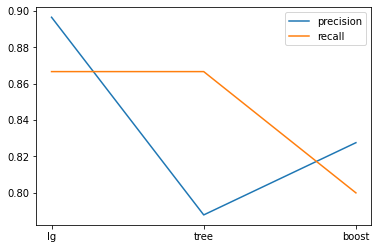

In [90]:
plt.plot(['lg', 'tree', 'boost'],precision_list, label='precision')
plt.plot(['lg', 'tree', 'boost'],recall_list, label='recall')
plt.legend()
plt.show()

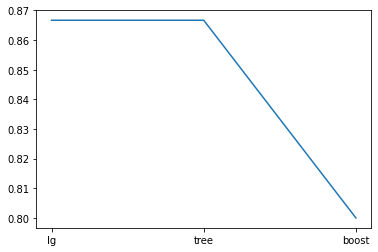

In [91]:
plt.plot(['lg','tree','boost'],recall_list)